NAME: OKPARAJI STANLEY UDODIRI

EMAIL: OKPARAJISTANLEY9@GMAIL.COM

HAMOYE ID: 14548b1b7c81f000

In [84]:
"""# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session"""

'# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session'

In [85]:
# Loading libraries
import os
import shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from skimage import io
%matplotlib inline

from IPython.display import display

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
os.getcwd()

'/kaggle/working'

#### Reading csv file and image file

In [88]:
# loading the train dataset
train_df = pd.read_csv('../input/planets-dataset/planet/planet/train_classes.csv')
train_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [89]:
# loading the sample submission dataset
sample_sub = pd.read_csv('../input/planets-dataset/planet/planet/sample_submission.csv')
sample_sub.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [90]:
train_df.shape, sample_sub.shape

((40479, 2), (61191, 2))

In [91]:
train_df.describe(include='all')

,image_name,tags
count,40479,40479
unique,40479,449
top,train_0,clear primary
freq,1,13636


In [92]:
image1 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_1.jpg')
image2 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_101.jpg')
image3 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_20499.jpg')
image4 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_40468.jpg')

<function matplotlib.pyplot.show(close=None, block=None)>

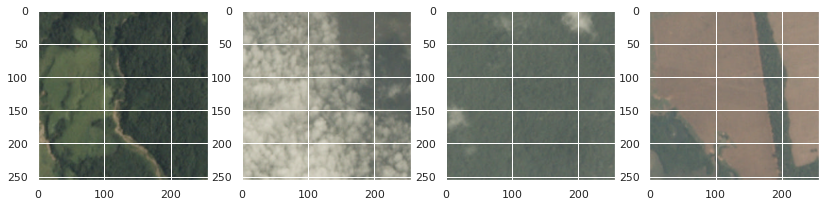

In [93]:
plt.figure(figsize=(14,10))

plt.subplot(1,4,1)
plt.imshow(image1)

plt.subplot(1,4,2)
plt.imshow(image2)

plt.subplot(1,4,3)
plt.imshow(image3)

plt.subplot(1,4,4)
plt.imshow(image4)

plt.show

In [94]:
# let try to view the image name and the tag
print(train_df[train_df['image_name'] == 'train_1'])
print(train_df[train_df['image_name'] == 'train_101'])
print(train_df[train_df['image_name'] == 'train_20499'])
print(train_df[train_df['image_name'] == 'train_40468'])

  image_name                             tags
1    train_1  agriculture clear primary water
    image_name    tags
101  train_101  cloudy
        image_name                   tags
20499  train_20499  partly_cloudy primary
        image_name                       tags
40468  train_40468  agriculture clear primary


#### Preprocessing and model Building

In [95]:
train_df['image_name'] = train_df['image_name'].apply(lambda x: '{}.jpg'.format(x))
train_df.head()

,image_name,tags
0,train_0.jpg,haze primary
1,train_1.jpg,agriculture clear primary water
2,train_2.jpg,clear primary
3,train_3.jpg,clear primary
4,train_4.jpg,agriculture clear habitation primary road


In [96]:
# build list with unique label
label_list = []

for tag_str in train_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [97]:
print(label_list)
print('###############################')
print(f'Length of label_list = {len(label_list)}')

['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']
###############################
Length of label_list = 17


In [98]:
# add one_hot features for every label
for label in label_list:
    train_df[label] = train_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)

train_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0.jpg,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [99]:
labels = list(train_df.columns[2:])
labels

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [100]:
def fbeta(ytrue, ypred, beta = 2, epsilon = 1e-4):
    beta_sqd = beta**2
    ytrue = tf.cast(ytrue, tf.float32)
    ypred = tf.cast(tf.greater(tf.cast(ypred, tf.float32), tf.constant(0.5)), tf.float32)
    
    true_pos = tf.reduce_sum(ytrue * ypred, axis = 1)
    false_pos = tf.reduce_sum(ypred, axis = 1) - true_pos
    false_neg = tf.reduce_sum(ytrue, axis = 1) - true_pos
    
    precision = true_pos / (true_pos + false_pos + epsilon)
    recall = true_pos / (true_pos + false_neg + epsilon)
    
    fb = (1 + beta_sqd) * precision * recall / (beta_sqd * precision + recall + epsilon)
    return fb

In [101]:
def multi_label_acc(ytrue, ypred, epsilon = 1e-4):
    ytrue = tf.cast(ytrue, tf.float32)
    ypred = tf.cast(tf.greater(tf.cast(ypred, tf.float32), tf.constant(0.5)), tf.float32)
    
    true_pos = tf.reduce_sum(ytrue * ypred, axis = 1)
    false_pos = tf.reduce_sum(ypred, axis = 1) - true_pos
    false_neg = tf.reduce_sum(ytrue, axis = 1) - true_pos
    
    ytrue = tf.cast(ytrue, tf.bool)
    ypred = tf.cast(ypred, tf.bool)
    
    true_neg = tf.reduce_sum(tf.cast(tf.logical_not(ytrue), tf.float32) * tf.cast(tf.logical_not(ypred), tf.float32), \
                             axis = 1)
    
    mla = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg + epsilon)
    return mla

In [102]:
seqmodel = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(128, 128, 3) ),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(64,(3, 3), activation='relu' ),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(128,(3, 3), activation='relu' ),
                                       tf.keras.layers.Dropout(0.25),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Dropout(0.25),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(128, activation='relu'),
                                       tf.keras.layers.Dropout(0.5),
                                       tf.keras.layers.Dense(17, activation='sigmoid')
    
      
                              ])

In [103]:
seqmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)      

In [104]:
seqmodel.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics = [multi_label_acc, fbeta])

In [105]:
train_data_gen = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [106]:
image_gen = ImageDataGenerator(rescale = 1/255, validation_split = 0.20)

In [107]:
save_best_checkpoint = ModelCheckpoint(filepath = 'best_model.hdf5', monitor = 'val_fbeta', \
                                      mode = 'max', save_best_only = True, save_weights_only = True)

In [108]:
train_gen = image_gen.flow_from_dataframe(dataframe = train_df, \
                                         directory = '../input/planets-dataset/planet/planet/train-jpg', x_col = 'image_name', y_col = labels, \
                                         target_size = (128,128), class_mode = 'raw', seed = 2, batch_size = 128, subset = 'training')

val_gen = image_gen.flow_from_dataframe(dataframe = train_df, \
                                         directory = '../input/planets-dataset/planet/planet/train-jpg', x_col = 'image_name', y_col = labels, \
                                         target_size = (128,128), class_mode = 'raw', seed = 2, batch_size = 128, subset = 'validation')

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [109]:
step_train_size = int(np.ceil(train_gen.samples / train_gen.batch_size))

step_val_size = int(np.ceil(val_gen.samples / val_gen.batch_size))

#### Train the Model

#### Model Training

In [110]:
history= seqmodel.fit(train_gen, 
             steps_per_epoch=step_train_size,
             epochs=20, 
             verbose=1,
             validation_data=val_gen,
             validation_steps=step_val_size,
             callbacks = [save_best_checkpoint])

Epoch 1/20
253/253 [==============================] - 97s 381ms/step - loss: 0.2445 - multi_label_acc: 0.9076 - fbeta: 0.6714 - val_loss: 0.2007 - val_multi_label_acc: 0.9215 - val_fbeta: 0.7136
Epoch 2/20
253/253 [==============================] - 97s 382ms/step - loss: 0.1993 - multi_label_acc: 0.9226 - fbeta: 0.7221 - val_loss: 0.1871 - val_multi_label_acc: 0.9300 - val_fbeta: 0.7499
Epoch 3/20
253/253 [==============================] - 97s 386ms/step - loss: 0.1835 - multi_label_acc: 0.9294 - fbeta: 0.7538 - val_loss: 0.1685 - val_multi_label_acc: 0.9362 - val_fbeta: 0.7709
Epoch 4/20
253/253 [==============================] - 97s 384ms/step - loss: 0.1739 - multi_label_acc: 0.9327 - fbeta: 0.7678 - val_loss: 0.1677 - val_multi_label_acc: 0.9353 - val_fbeta: 0.7831
Epoch 5/20
253/253 [==============================] - 97s 383ms/step - loss: 0.1669 - multi_label_acc: 0.9350 - fbeta: 0.7763 - val_loss: 0.1702 - val_multi_label_acc: 0.9365 - val_fbeta: 0.7706
Epoch 6/20
253/253 [=====

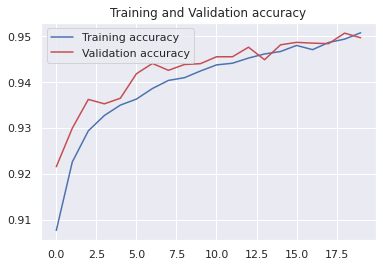

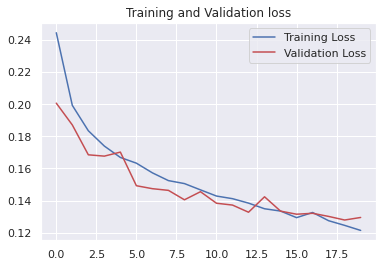

In [111]:
acc = history.history['multi_label_acc']
val_acc = history.history['val_multi_label_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [112]:
history2 = seqmodel

history2.load_weights('best_model.hdf5')

In [113]:
my_sample_submission = sample_sub.copy()
my_sample_submission['image_name'] = my_sample_submission['image_name'].apply(lambda x: '{}.jpg'.format(x))
len(my_sample_submission)

61191

In [114]:
test1_df = my_sample_submission.iloc[:40669]['image_name'].reset_index()
test1_df.drop('index', axis = 1)
test1_df.head(2)

,index,image_name
0,0,test_0.jpg
1,1,test_1.jpg


In [115]:
test1_gen = image_gen.flow_from_dataframe(dataframe = test1_df, \
                                         directory = '../input/planets-dataset/planet/planet/test-jpg', x_col = 'image_name', y_col = None, \
                                         target_size = (128,128), class_mode = None, shuffle = False, batch_size = 128)


Found 40669 validated image filenames.


In [116]:
step_test1_size = int(np.ceil(test1_gen.samples / test1_gen.batch_size))

In [117]:
test1_gen.reset()
pred1 = history2.predict(test1_gen, steps = step_test1_size, verbose = 1)

318/318 [==============================] - 95s 299ms/step


In [118]:
test1_file_names = test1_gen.filenames

pred1_tags = pd.DataFrame(pred1)
pred1_tags = pred1_tags.apply(lambda x: ' '.join(np.array(labels)[x > 0.5]), axis = 1)

In [119]:
result1 = pd.DataFrame({'image_name': test1_file_names, 'tags': pred1_tags})
result1.head(2)

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear


In [120]:
test2_df = my_sample_submission.iloc[40669:]['image_name'].reset_index()
test2_df.drop('index', axis = 1)
test2_df.head(2)

,index,image_name
0,40669,file_0.jpg
1,40670,file_1.jpg


In [121]:
test2_gen = image_gen.flow_from_dataframe(dataframe = test2_df, \
                                         directory = '../input/planets-dataset/test-jpg-additional/test-jpg-additional', x_col = 'image_name', y_col = None, \
                                         target_size = (128,128), class_mode = None, shuffle = False, batch_size = 128)


step_test2_size = int(np.ceil(test2_gen.samples / test2_gen.batch_size))

test2_gen.reset()
pred2 = history2.predict(test2_gen, steps = step_test2_size, verbose = 1)

test2_file_names = test2_gen.filenames

pred2_tags = pd.DataFrame(pred2)
pred2_tags = pred2_tags.apply(lambda x: ' '.join(np.array(labels)[x > 0.5]), axis = 1)

result2 = pd.DataFrame({'image_name': test2_file_names, 'tags': pred2_tags})
result2.head(2)

Found 20522 validated image filenames.
161/161 [==============================] - 47s 292ms/step


,image_name,tags
0,file_0.jpg,primary clear
1,file_1.jpg,primary agriculture road


In [122]:
final_result = pd.concat([result1, result2])

final_result = final_result.reset_index().drop('index', axis = 1)

final_result.head(2)

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear


In [123]:
final_result['image_name'] = final_result['image_name'].str.replace('.jpg','')
final_result.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,image_name,tags
0,test_0,primary clear
1,test_1,primary clear
2,test_2,primary partly_cloudy
3,test_3,primary clear
4,test_4,primary partly_cloudy


In [124]:
final_result.to_csv("my_hamoye_kaggle_project_4.csv", index = False)